In [1]:
library('ggplot2')
library(grid)
library(tidyverse)

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [29]:
df = read.csv('Results/results_with_null.csv')

Warning message:
“Removed 35 row(s) containing missing values (geom_path).”


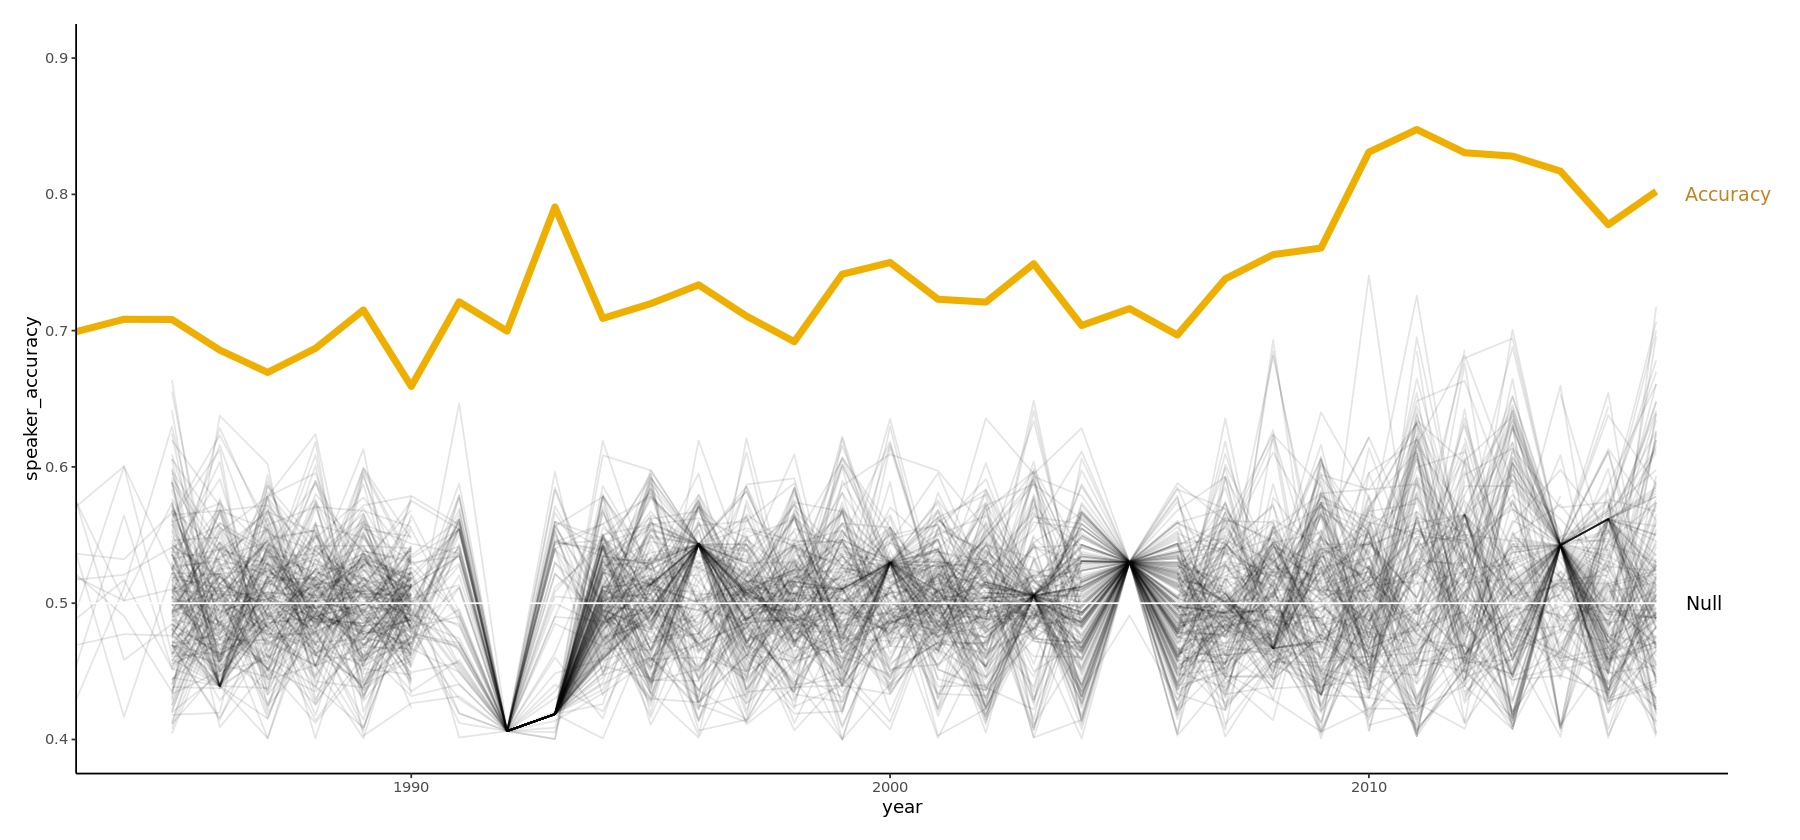

In [30]:
options(repr.plot.width = 15, repr.plot.height = 7)

p = ggplot(df,aes(x = year, y = speaker_accuracy)) + 
  geom_line(data=df[df$type == "actual",],color='#efaf00',aes(group=iteration),size=2) + 
  geom_line(data=df[df$type != "actual",],aes(group=iteration),alpha=0.1,size=0.5) + 
  annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='white') +
  theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
  scale_x_continuous(expand = c(0,0)) +
  ylim(0.4,0.9) +
  annotate('text',label='Accuracy',x=2017.5,y=0.80,size=4,color='#c18422') +
  annotate('text',label='Null',x=2017,y=0.50,size=4,color='black')


gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

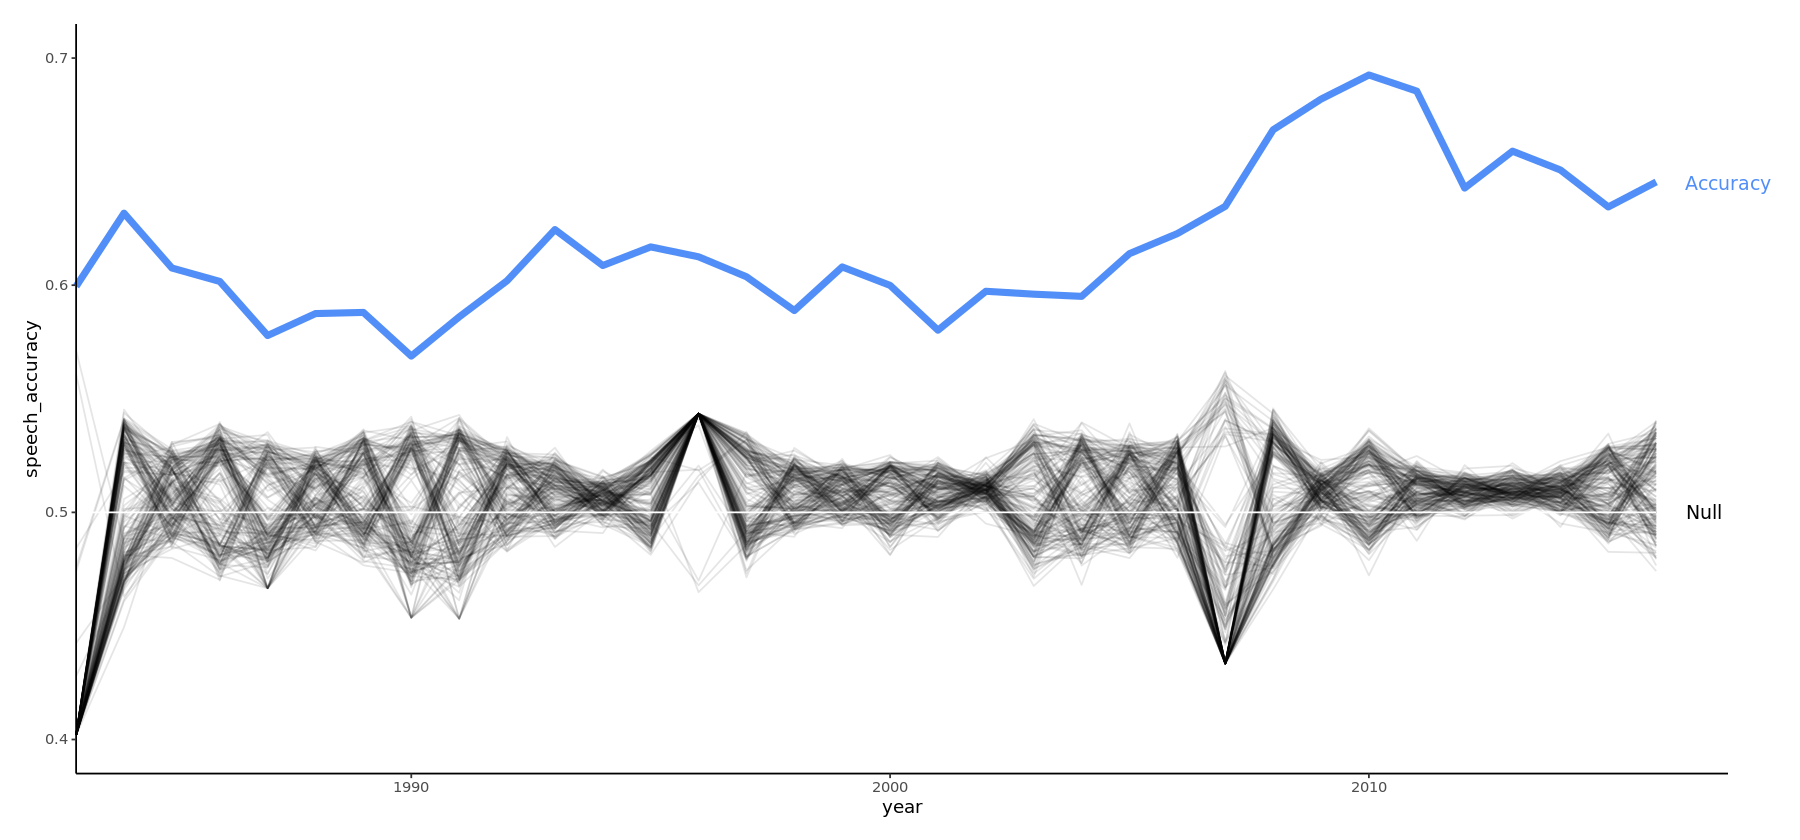

In [59]:
options(repr.plot.width = 15, repr.plot.height = 7)

p = ggplot(df,aes(x = year, y = speech_accuracy)) + 
  geom_line(data=df[df$type == "actual",],color='#518ef7',aes(group=iteration),size=2) + 
  geom_line(data=df[df$type != "actual",],aes(group=iteration),alpha=0.1,size=0.5) + 
  annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='white') +
  theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
  scale_x_continuous(expand = c(0,0)) +
  ylim(0.4,0.7) +
  annotate('text',label='Accuracy',x=2017.5,y=0.645,size=4,color='#518ef7') +
  annotate('text',label='Null',x=2017,y=0.50,size=4,color='black')


gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

In [61]:
boots = read.csv('bootstrap_results.csv')

Selecting by speech_accuracy

`geom_smooth()` using formula 'y ~ x'



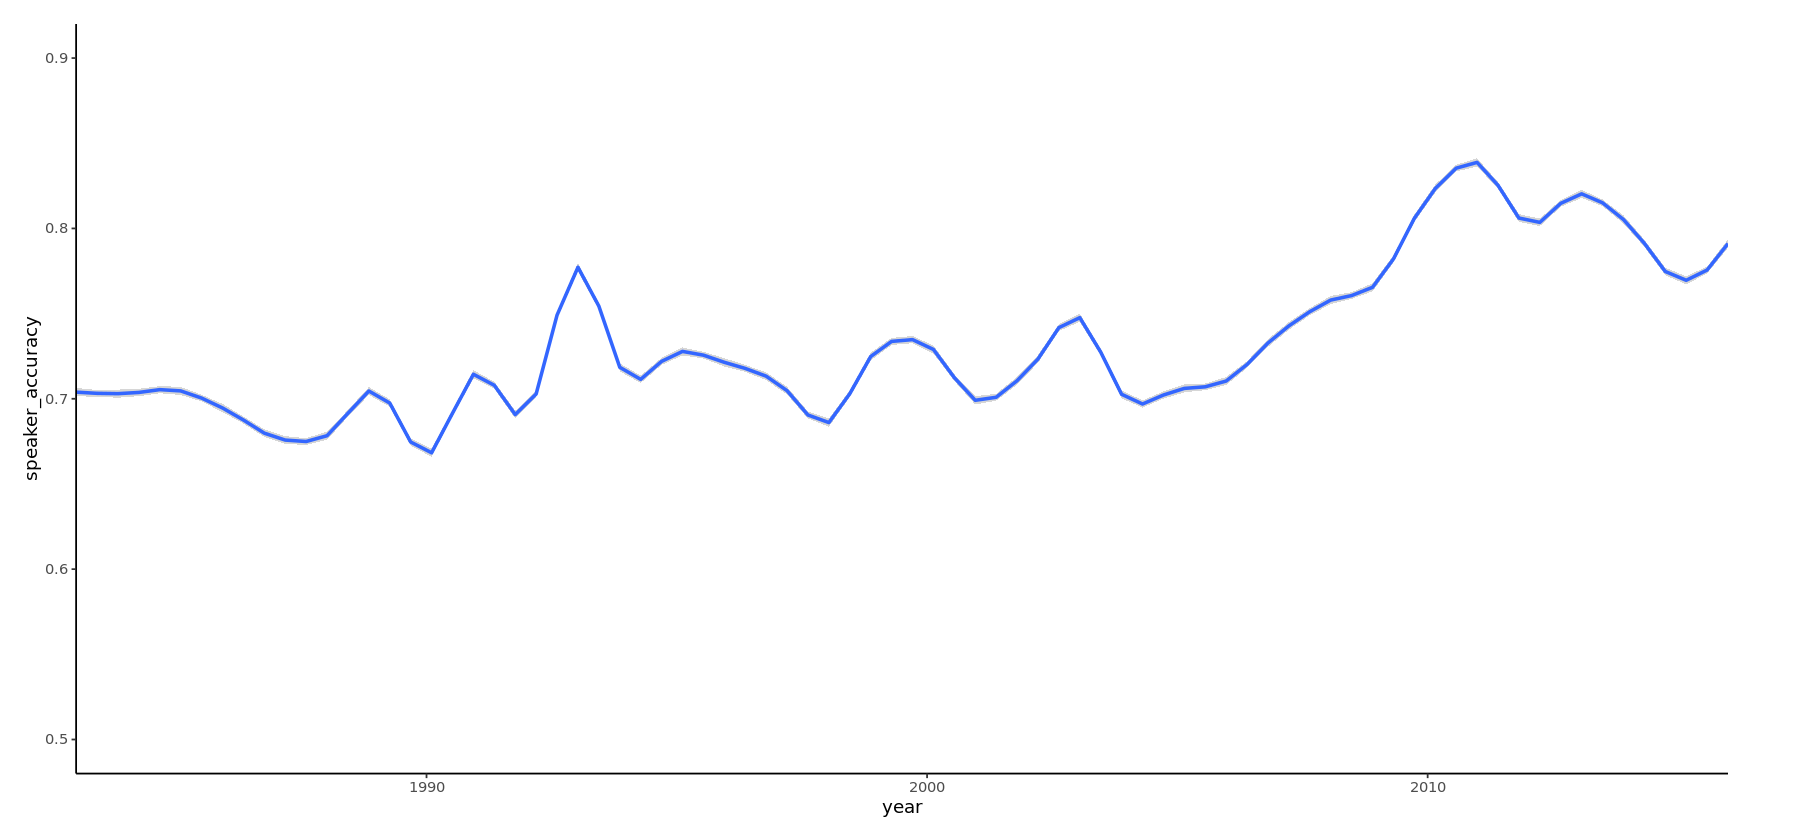

In [74]:

boots %>%
    group_by(year) %>%
    top_n(100) %>%
    ggplot(aes(x = year, y=speaker_accuracy)) +
    geom_smooth(method = "loess",span=0.1,) +
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='white') +
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
  scale_x_continuous(expand = c(0,0)) +
  ylim(0.5,0.9)

Selecting by speech_accuracy

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 63 rows containing non-finite values (stat_smooth).”


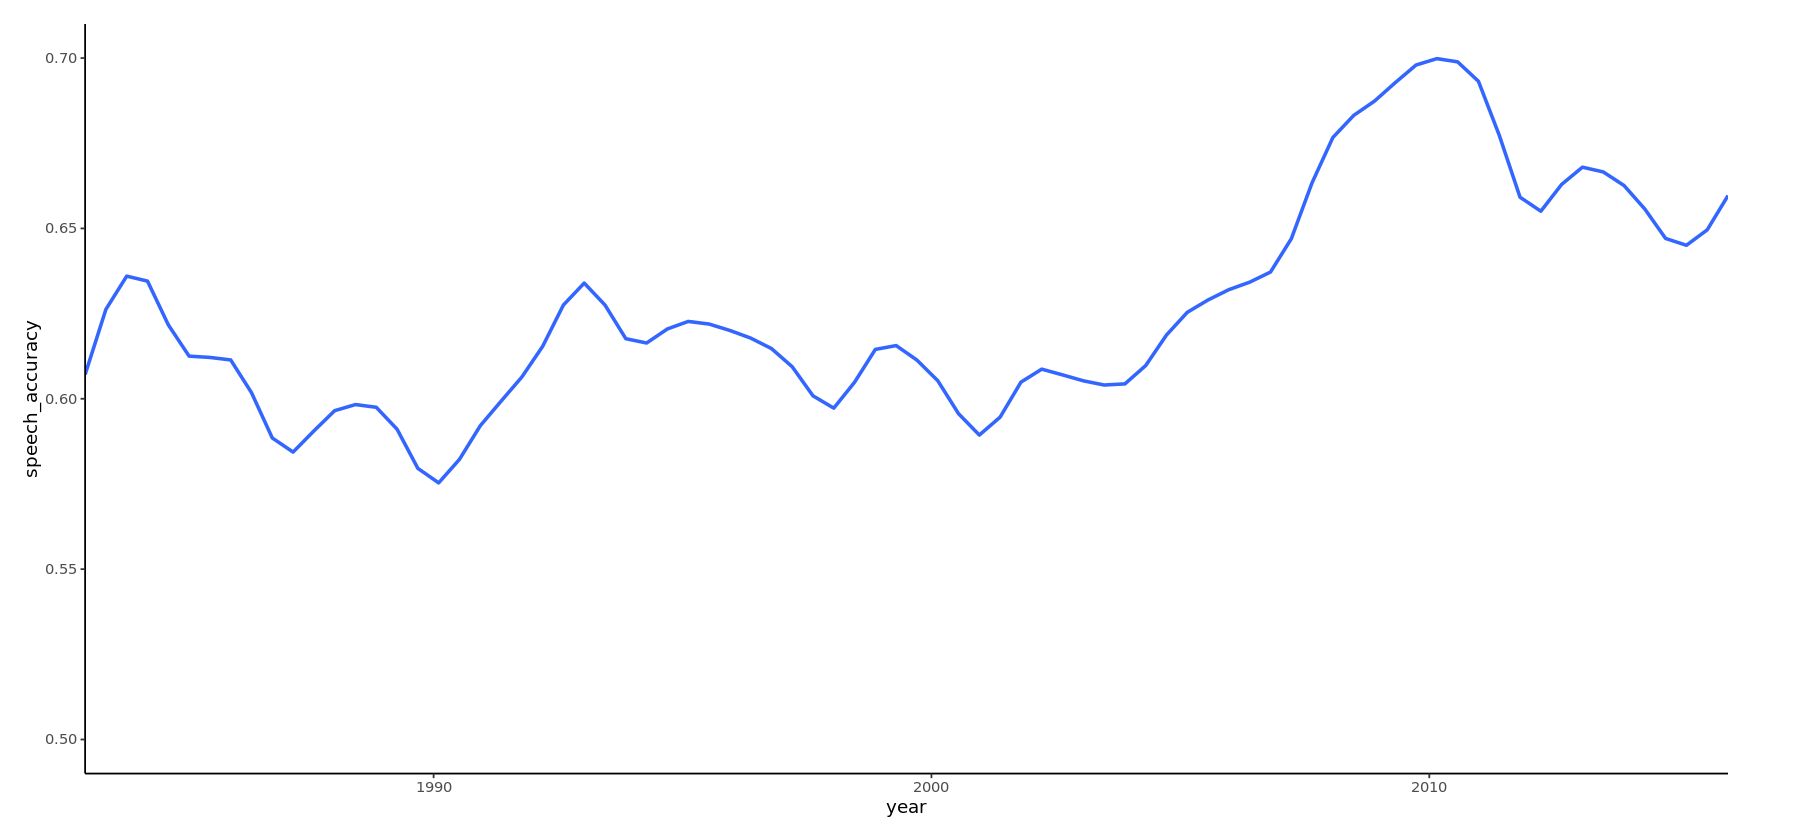

In [73]:

boots %>%
    group_by(year) %>%
    top_n(100) %>%
    ggplot(aes(x = year, y=speech_accuracy)) +
    geom_smooth(method = "loess",span=0.1,) +
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='white') +
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
  scale_x_continuous(expand = c(0,0)) +
  ylim(0.5,0.7)

In [2]:
speakers = read.csv('Results/speaker_estimates.csv')

In [46]:
max(speakers$prob_party_x)

[1] 0.9971209

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



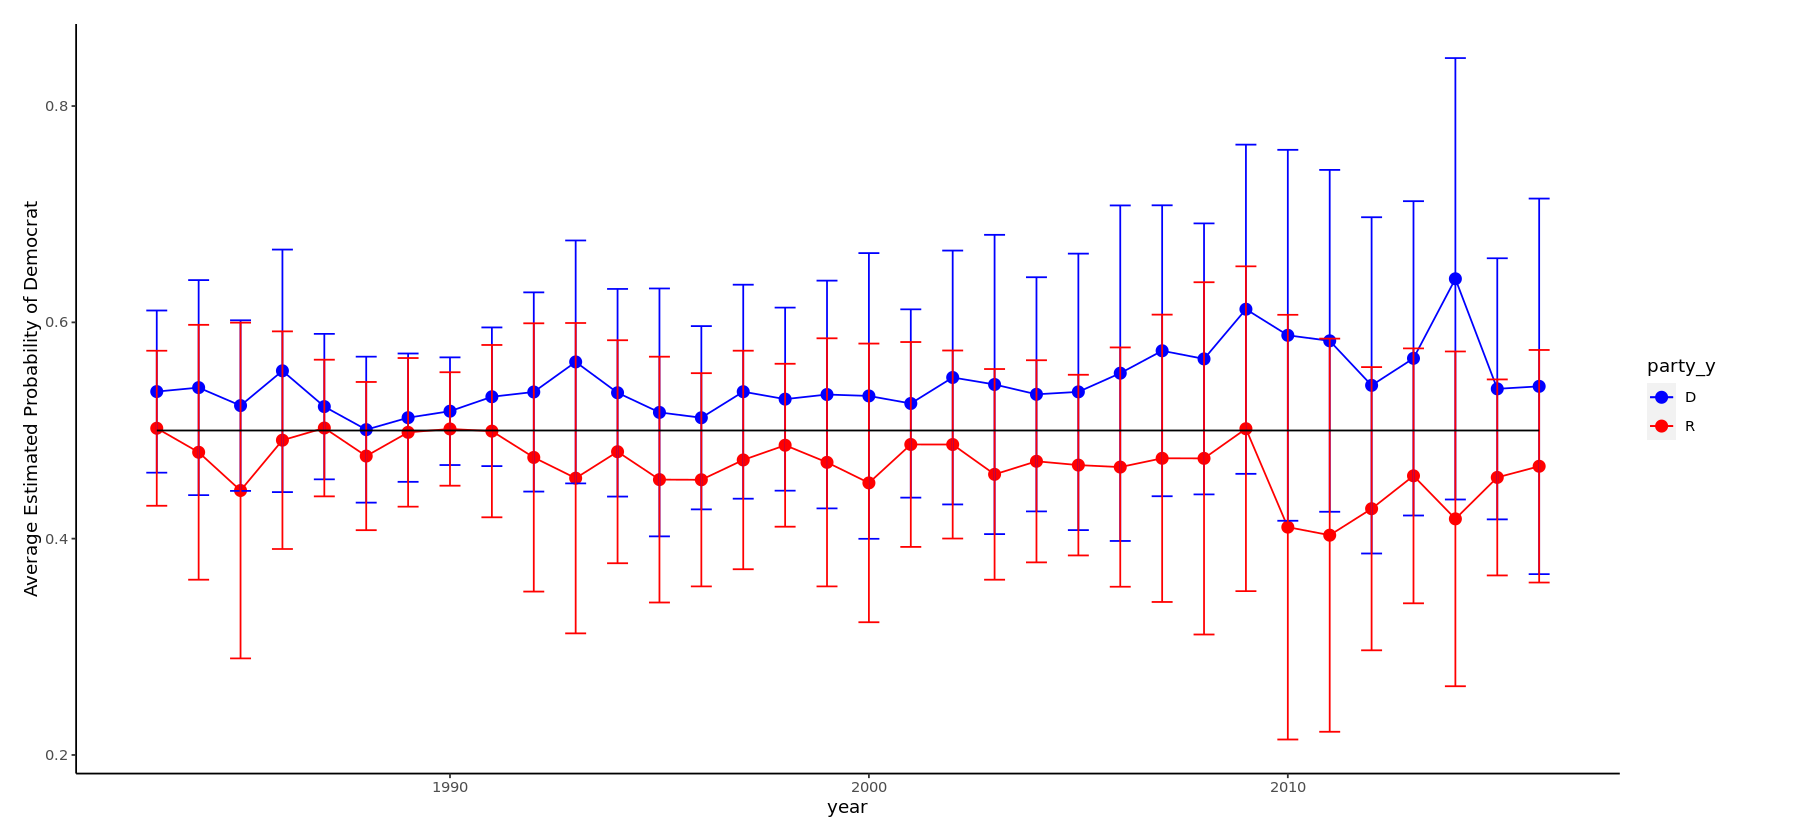

In [53]:
speakers %>%
    subset(party_y != 'I') %>%
    group_by(year,party_y) %>%
    summarize(m = mean(prob_party_y),std=sd(prob_party_y)) %>%
    ggplot(aes(x = year,y=m,color=party_y)) + 
    geom_point(size=3) + 
    geom_line() + 
    geom_errorbar(aes(ymin=m-std,ymax=m+std,width=0.5)) + 
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) + 
    scale_color_manual(values=c('blue','red')) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='black') + 
    ylab('Average Estimated Probability of Democrat')


## Supplementals

#### SVC results

In [54]:
svc = read.csv('Results/SVC_classification_results_with_coefs.csv')

In [66]:
svc = svc[,c('year','speaker_accuracy','speech_accuracy')]
colnames(svc) = c('year','svc_speaker_accuracy','svc_speech_accuracy')

ERROR: Error in `[.data.frame`(svc, , c("year", "speaker_accuracy", "speech_accuracy")): undefined columns selected


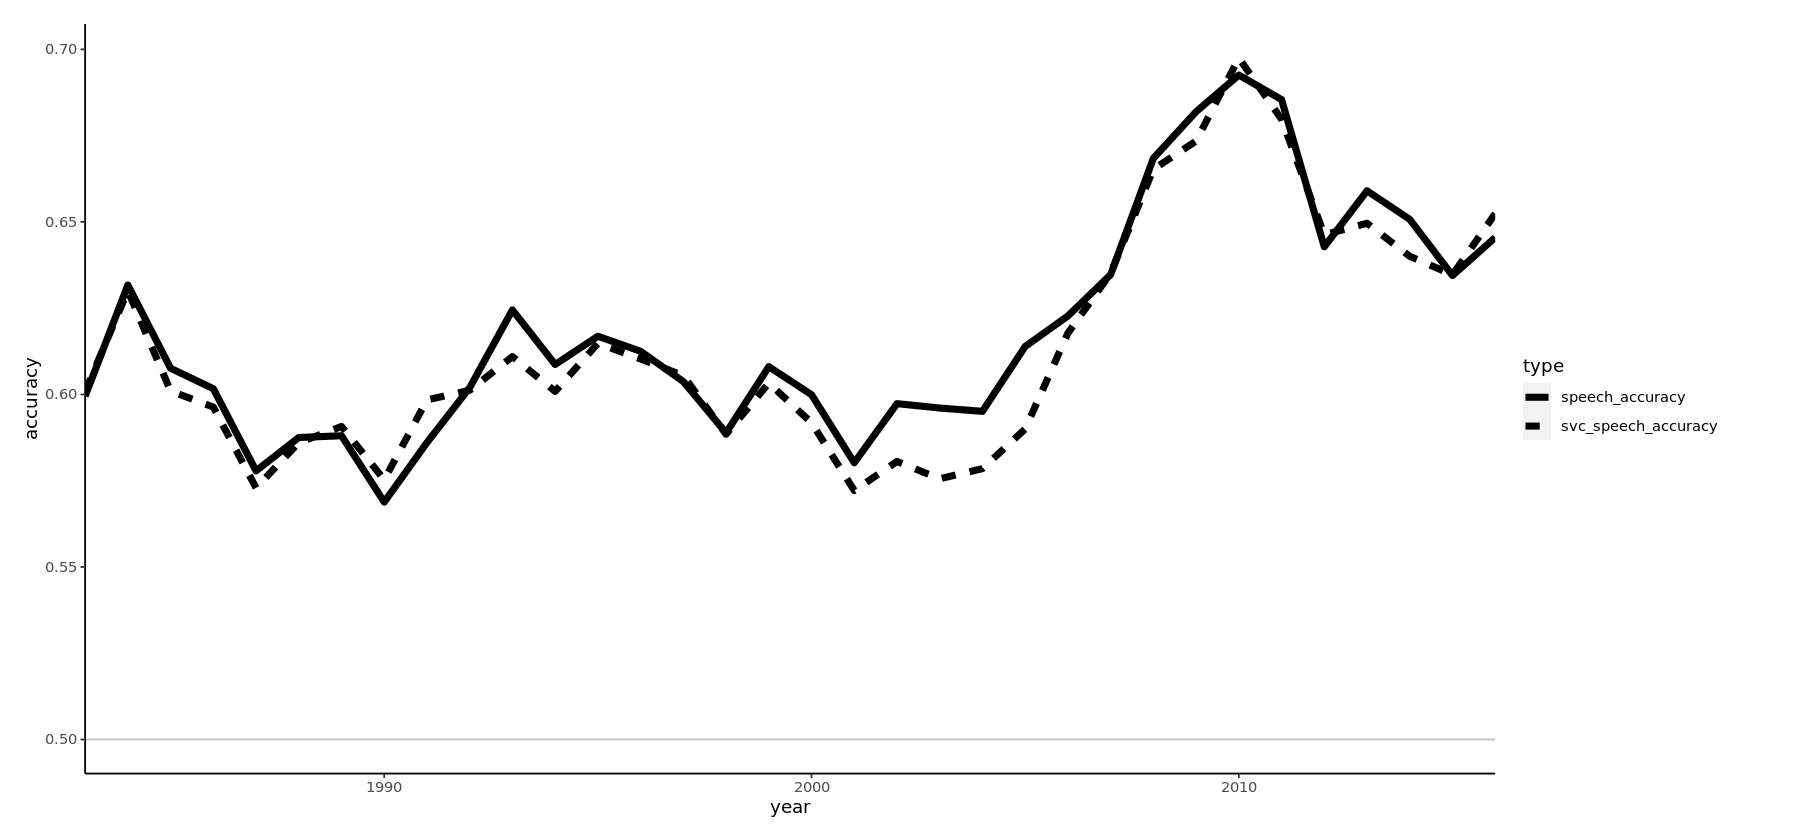

In [89]:
df %>%
    subset(type == 'actual') %>%
    merge(svc,on='year',how='left') %>%
    select(c("year",'speech_accuracy','svc_speech_accuracy')) %>%
    pivot_longer(!year, names_to = "type", values_to = "accuracy") %>%
    ggplot(aes(x = year, y = accuracy,linetype=type)) + 
    geom_line(size=2) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
    scale_x_continuous(expand = c(0,0))

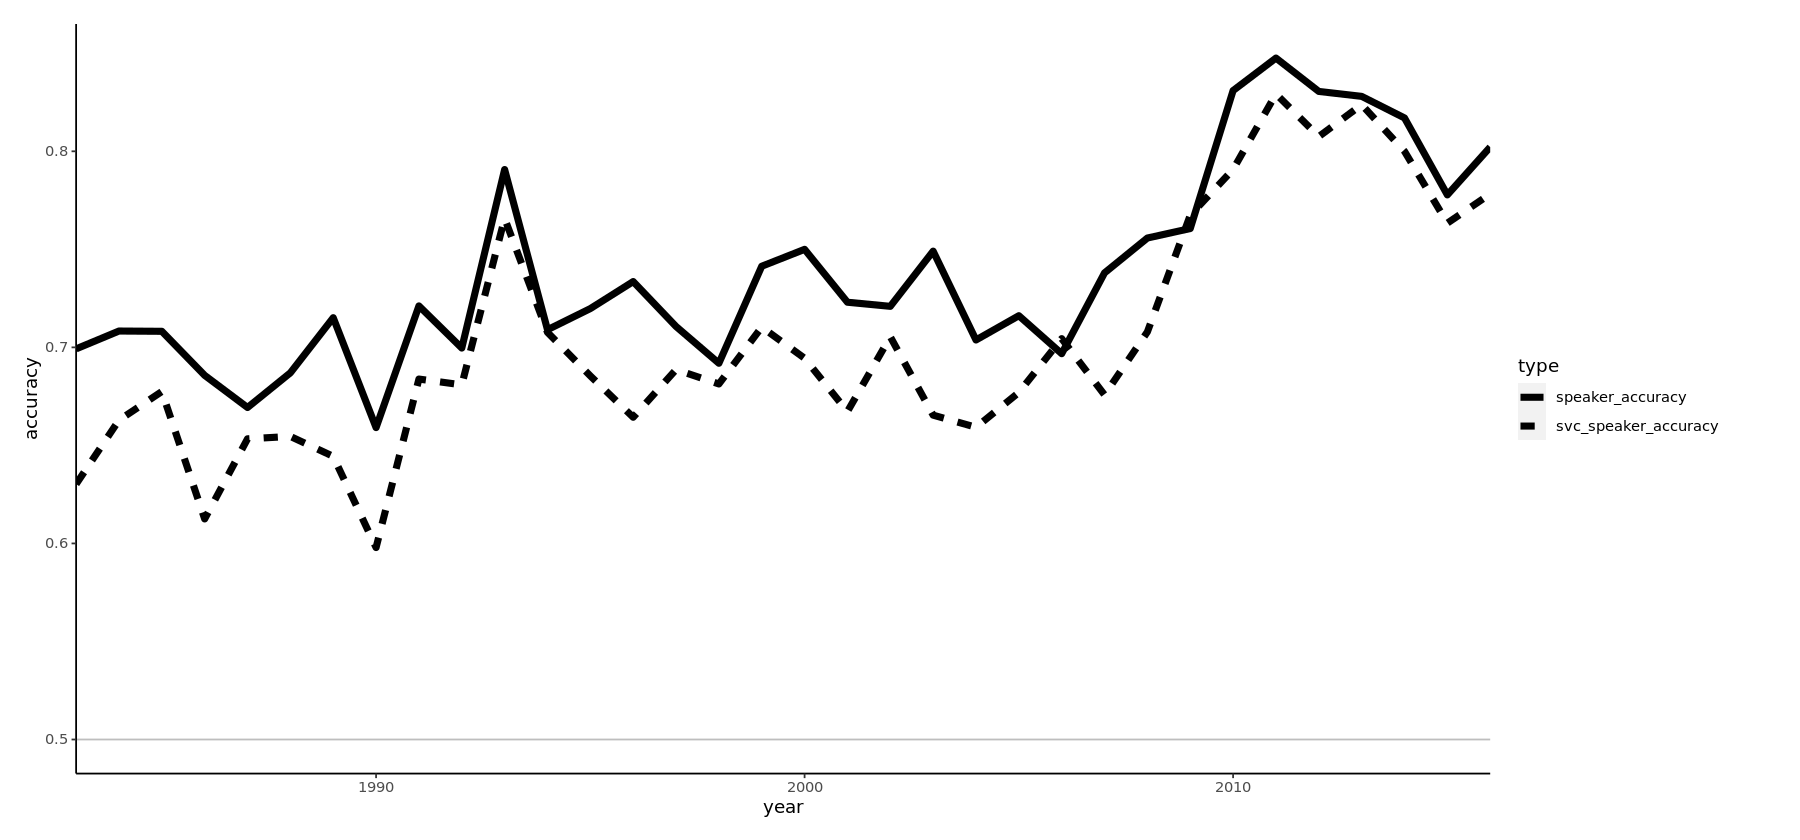

In [88]:
df %>%
    subset(type == 'actual') %>%
    merge(svc,on='year',how='left') %>%
    select(c("year",'speaker_accuracy','svc_speaker_accuracy')) %>%
    pivot_longer(!year, names_to = "type", values_to = "accuracy") %>%
    ggplot(aes(x = year, y = accuracy,linetype=type)) + 
    geom_line(size=2) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    theme(panel.background = element_blank(),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line()) +
    scale_x_continuous(expand = c(0,0))